In [225]:
import numpy as np
import pandas as pd
import copy
import time
import datetime as dt
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [226]:
def Boll_Band(DF,n=20):
    df=DF.copy()
    df["MB"]=df["Adj Close"].rolling(n).mean()
    df["UB"]=df["MB"]+2*df["Adj Close"].rolling(n).std(ddof=0)
    df["LB"]=df["MB"]-2*df["Adj Close"].rolling(n).std(ddof=0)
    df["BB_Width"]=df["UB"]-df["LB"]
    return df[["MB","UB","LB","BB_Width"]]

In [227]:
# download the data
ticker="SPY"
spy=yf.download(ticker,period='60d',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [228]:
spy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-29 09:30:00-04:00,381.230011,381.720001,379.160004,379.399994,379.399994,3688437
2022-06-29 09:35:00-04:00,379.399994,380.089996,378.959991,379.040009,379.040009,1243844
2022-06-29 09:40:00-04:00,379.040009,379.600006,378.649994,379.070007,379.070007,1433485
2022-06-29 09:45:00-04:00,379.070007,379.690002,378.420013,379.540009,379.540009,1122696
2022-06-29 09:50:00-04:00,379.510010,381.910004,379.390106,381.600006,381.600006,1470028
...,...,...,...,...,...,...
2022-09-22 12:35:00-04:00,374.649994,375.350006,374.619995,375.149994,375.149994,673600
2022-09-22 12:40:00-04:00,375.149994,375.489990,374.980011,375.220001,375.220001,937199
2022-09-22 12:45:00-04:00,375.179993,375.540009,374.890015,374.980011,374.980011,416255


In [229]:
Bollinger=Boll_Band(spy)
Bollinger

,MB,UB,LB,BB_Width
Datetime,,,,
2022-06-29 09:30:00-04:00,NaN,NaN,NaN,NaN
2022-06-29 09:35:00-04:00,NaN,NaN,NaN,NaN
2022-06-29 09:40:00-04:00,NaN,NaN,NaN,NaN
2022-06-29 09:45:00-04:00,NaN,NaN,NaN,NaN
2022-06-29 09:50:00-04:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-09-22 12:35:00-04:00,374.601134,375.627753,373.574515,2.053238
2022-09-22 12:40:00-04:00,374.665384,375.677948,373.652820,2.025128
2022-09-22 12:45:00-04:00,374.684764,375.705801,373.663727,2.042074


In [231]:
signal_list=[]
signal=""
for i in range(len(spy)):
    if signal=="":
        if spy["Adj Close"][i]>=Bollinger["UB"][i]:
            signal="Buy Call"
            signal_list.append(signal)
        elif spy["Adj Close"][i]<=Bollinger["LB"][i]:
            signal="Buy Put"
            signal_list.append(signal)
        else:
            signal_list.append("")
    elif signal=="Buy Call":
        #sell signal
        if spy["Adj Close"][i]<=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
        else:
            signal_list.append("")
    elif signal=="Buy Put":
        #sell signal
        if spy["Adj Close"][i]>=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
        else:
            signal_list.append("")

In [232]:
signal_list=[]
signal=""
return_list=[]
for i in range(len(spy)):
    if signal=="":
        if spy["Adj Close"][i]>=Bollinger["UB"][i]:
            signal="Buy Call"
            signal_list.append(signal)
            cost=spy["Adj Close"][i]
            return_list.append(0)
        elif spy["Adj Close"][i]<=Bollinger["LB"][i]:
            signal="Buy Put"
            signal_list.append(signal)
            cost=spy["Adj Close"][i]
            return_list.append(0)
        else:
            signal_list.append("")
            return_list.append(0)
    elif signal=="Buy Call":
        #sell signal
        if spy["Adj Close"][i]<=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
            return_list.append(spy["Adj Close"][i]-cost)
        else:
            signal_list.append("")
            return_list.append(0)
            
    elif signal=="Buy Put":
        #sell signal
        if spy["Adj Close"][i]>=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
            return_list.append(cost-spy["Adj Close"][i])
        else:
            signal_list.append("")
            return_list.append(0)

In [233]:
len(signal_list)

4644

In [234]:
len(return_list)

4644

In [235]:
Bollinger["signal"]=signal_list
Bollinger["return"]=return_list

In [236]:
Bollinger

,MB,UB,LB,BB_Width,signal,return
Datetime,,,,,,
2022-06-29 09:30:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-29 09:35:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-29 09:40:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-29 09:45:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-29 09:50:00-04:00,NaN,NaN,NaN,NaN,,0.0
...,...,...,...,...,...,...
2022-09-22 12:35:00-04:00,374.601134,375.627753,373.574515,2.053238,,0.0
2022-09-22 12:40:00-04:00,374.665384,375.677948,373.652820,2.025128,,0.0
2022-09-22 12:45:00-04:00,374.684764,375.705801,373.663727,2.042074,,0.0


<AxesSubplot:xlabel='Datetime'>

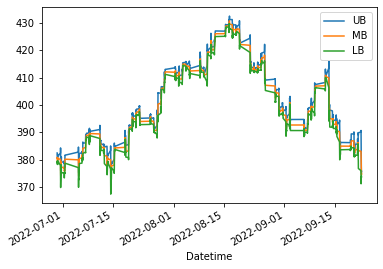

In [237]:
Bollinger[["UB","MB","LB"]].plot()

<AxesSubplot:xlabel='Datetime'>

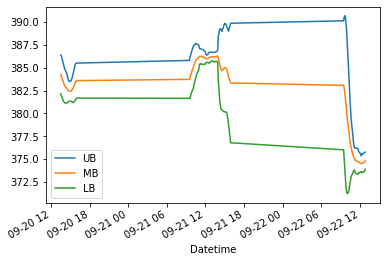

In [241]:
Bollinger[["UB","MB","LB"]][-150:].plot()

In [242]:
import numpy as np
np.sum(Bollinger['return'])

3.746307373046875

In [243]:
Bollinger['return'].sum()

3.746307373046875

In [244]:
Bollinger['return'].cumsum()

Datetime
2022-06-29 09:30:00-04:00    0.000000
2022-06-29 09:35:00-04:00    0.000000
2022-06-29 09:40:00-04:00    0.000000
2022-06-29 09:45:00-04:00    0.000000
2022-06-29 09:50:00-04:00    0.000000
                               ...   
2022-09-22 12:35:00-04:00    3.746307
2022-09-22 12:40:00-04:00    3.746307
2022-09-22 12:45:00-04:00    3.746307
2022-09-22 12:50:00-04:00    3.746307
2022-09-22 12:51:16-04:00    3.746307
Name: return, Length: 4644, dtype: float64

In [245]:
Bollinger["cum_return"]=Bollinger['return'].cumsum()

In [246]:
Bollinger["Adj Close"]=spy["Adj Close"]

In [247]:
Bollinger

,MB,UB,LB,BB_Width,signal,return,cum_return,Adj Close
Datetime,,,,,,,,
2022-06-29 09:30:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,379.399994
2022-06-29 09:35:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,379.040009
2022-06-29 09:40:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,379.070007
2022-06-29 09:45:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,379.540009
2022-06-29 09:50:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,381.600006
...,...,...,...,...,...,...,...,...
2022-09-22 12:35:00-04:00,374.601134,375.627753,373.574515,2.053238,,0.0,3.746307,375.149994
2022-09-22 12:40:00-04:00,374.665384,375.677948,373.652820,2.025128,,0.0,3.746307,375.220001
2022-09-22 12:45:00-04:00,374.684764,375.705801,373.663727,2.042074,,0.0,3.746307,374.980011


<AxesSubplot:xlabel='Datetime'>

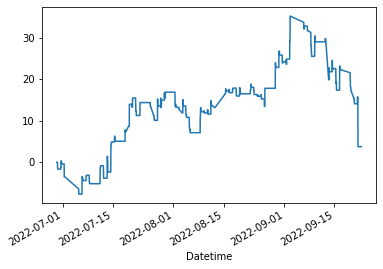

In [248]:
Bollinger["cum_return"].plot()

In [249]:
Bollinger.to_csv('bollinger_strategy.csv')